<a href="https://colab.research.google.com/github/shrestha-bikash/K-Means-Clustering/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
class K_Means_Clustering:
    def __init__(self, data_points, k):
        self.k = k
        self.data_points = data_points

    def calculate_new_centroids(self):                        
        self.centroids = [np.mean(self.clusters[item], axis=0) for item in self.clusters]
        return self.centroids
    
    def l2_norm(self, p1, p2):
        return np.linalg.norm(p1 - p2)

    def l1_norm(p1, p2):
        return np.linalg.norm((p1 - p2), ord=1)
    
    def calc_intra_sq_dist(self):
        for i, center in enumerate(self.centroids):
            self.intra_sq_dist = np.sum([np.square(self.l2_norm(point, center)) for point in self.clusters[str(i)]])
            print('intra_sq_dist for cluster', i+1, ':', self.intra_sq_dist)

    def calc_intra_dist(self):
        for i, center in enumerate(self.centroids):
            self.intra_dist = np.sum([self.l1_norm(point, center) for point in self.clusters[str(i)]])
            print('intra_dist for cluster', i+1, ':', self.intra_dist)

    def plot_clusters(self, title='Showing Cluster'):
        np.random.seed(10) # for generating same rgb values for colormap

        for key, center in zip(self.clusters, self.centroids):
            color = np.random.rand(1,3)
            data = np.array(self.clusters[key])
            x_c, y_c = data[:, 0], data[:, 1]
            plt.scatter(x_c, y_c, c=color, marker='o', label='Cluster'+key)
            plt.scatter(center[0], center[1], c=color, marker='x', label='Centroid'+key)

        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        plt.title(title)
        plt.show()
    
    def generate_clusters(self):
        clusters = {}
        for index in range(self.k):
            clusters[str(index)] = []


        for point in self.data_points:
            d = [self.l2_norm(point, center) for center in self.centroids]
            cluster_index = np.argmin(d)
            # print(cluster_index)
            
            clusters[str(cluster_index)].append(point)
            # print(clusters)
        
        return clusters
    
    def initialize_centroids(self, seed):
        np.random.seed(seed)
        return self.data_points[np.random.choice(data_points.shape[0], self.k, replace=False), :]

    def fit_k_means_clustering(self, seed=42):
        self.it_count = 100

        # generate the initial center points (centroids)
        self.centroids = self.initialize_centroids(seed)
        print('starting centroids:', self.centroids)

        # temp act as a placeholder for previous centorids to compare with new centroids
        self.temp = np.zeros((self.k, 2)) 
        
        while((not np.allclose(self.centroids, self.temp)) or (self.it_count < 0)):
            self.temp = self.centroids
            self.clusters = self.generate_clusters()
            self.centroids = self.calculate_new_centroids()

            self.it_count -= 1

        print('Convergence Iteration Count:', 100 - self.it_count)

        return self.centroids, self.clusters
    
    def predict(self, test_points):
        cluster_index = []
        for point in test_points:
            d = [self.l2_norm(point, center) for center in self.centroids]
            cluster_index.append(np.argmin(d))
        
        return cluster_index

In [37]:
def generate_data_points(N=50, seed=42):
    np.random.seed(seed)
    data_points = np.random.uniform(1,100, (N, 2))

    return data_points



**** For Seed: 3 ****

starting centroids: [[46.15092844 78.73242018]
 [36.48810713 12.47103689]
 [43.76255685 29.83168488]
 [77.32575082 49.88576404]]
Convergence Iteration Count: 11


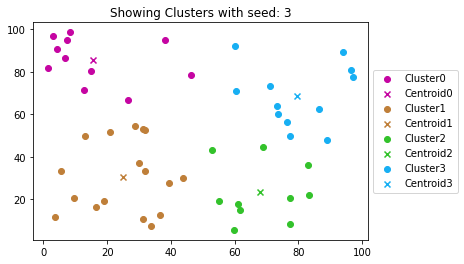


**** For Seed: 10 ****

starting centroids: [[70.97887704 73.17170964]
 [31.85939653 52.4867341 ]
 [88.83406152 47.74927759]
 [31.78724985 33.19314888]]
Convergence Iteration Count: 6


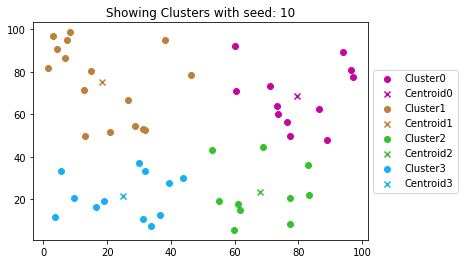


**** For Seed: 24 ****

starting centroids: [[31.11998205 52.95088673]
 [ 3.03786494 97.02107536]
 [28.81251646 54.72691223]
 [94.01039521 89.58790769]]
Convergence Iteration Count: 5


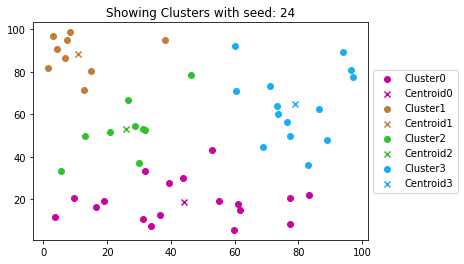


**** For Seed: 33 ****

starting centroids: [[ 3.03786494 97.02107536]
 [60.1920979  92.26554927]
 [70.97887704 73.17170964]
 [61.14694034 17.88188825]]
Convergence Iteration Count: 4


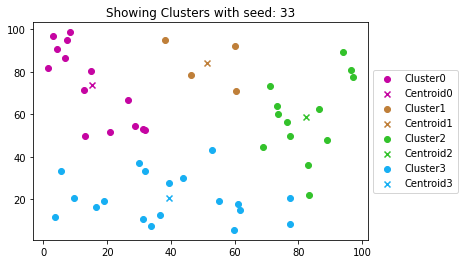


**** For Seed: 42 ****

starting centroids: [[20.76770443 51.9092094 ]
 [36.48810713 12.47103689]
 [39.47905168 27.86355415]
 [12.83983035 71.61123394]]
Convergence Iteration Count: 4


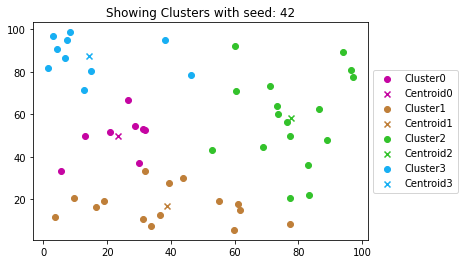


**** For Seed: 51 ****

starting centroids: [[60.51038616 71.0991852 ]
 [52.75055011 43.32656082]
 [77.32575082 49.88576404]
 [61.14694034 17.88188825]]
Convergence Iteration Count: 4


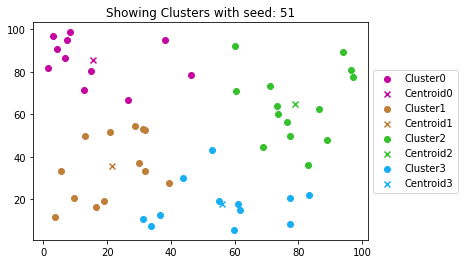


**** For Seed: 55 ****

starting centroids: [[ 6.7502776  86.75143843]
 [26.61921818 66.58970615]
 [ 9.7607577  20.40230338]
 [61.14694034 17.88188825]]
Convergence Iteration Count: 5


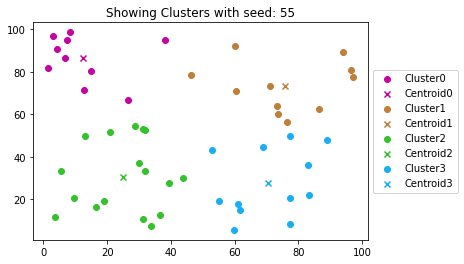


**** For Seed: 72 ****

starting centroids: [[52.75055011 43.32656082]
 [26.61921818 66.58970615]
 [60.51038616 71.0991852 ]
 [29.9223202  37.26982249]]
Convergence Iteration Count: 4


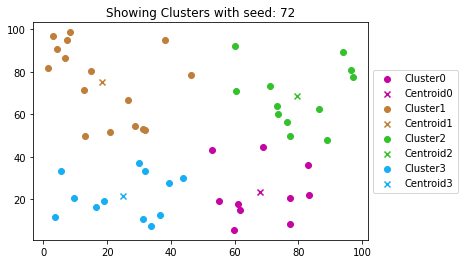


**** For Seed: 81 ****

starting centroids: [[73.23101166 64.11818966]
 [31.85939653 52.4867341 ]
 [19.00067175 19.15704648]
 [77.35576432  8.33042052]]
Convergence Iteration Count: 4


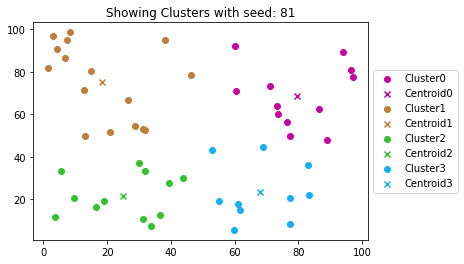


**** For Seed: 99 ****

starting centroids: [[ 7.44010771 94.93966819]
 [28.81251646 54.72691223]
 [20.76770443 51.9092094 ]
 [29.9223202  37.26982249]]
Convergence Iteration Count: 5


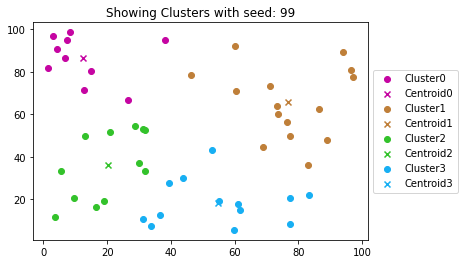

In [42]:
# number of clusters
k = 4

# randomly generating 2D data points
data_points = generate_data_points(50, seed=42) 

# different seed values to generate different random centroids for multiple runs
seeds = [3, 10, 24, 33, 42, 51, 55, 72, 81, 99]

k_mean = K_Means_Clustering(data_points, k)

for seed in seeds:
    print('\n**** For Seed:', seed, '****\n')
    k_mean.fit_k_means_clustering(seed)
    k_mean.plot_clusters(title=f'Showing Clusters with seed: {seed}')

In [31]:
test_points = generate_data_points(10, seed=47)
print('Test Points:')
print(test_points)

prediction = k_mean.predict(test_points)

print('Predicted Clusters', prediction)

Test Points:
[[12.23535872 97.47382635]
 [73.14472872 35.79531278]
 [71.05290869 80.16085556]
 [64.9106236  42.04536111]
 [70.89707012 25.4182888 ]
 [26.3432507   3.37712406]
 [10.77386953 30.7432071 ]
 [64.4447121  32.89858686]
 [19.36391967 91.80216135]
 [27.82115953 28.08124127]]
Predicted Clusters [0, 3, 1, 3, 3, 3, 2, 3, 0, 2]
